### Import libraries using Alias

In [1]:
import pandas as pd 
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import accuracy_score
import sklearn.metrics as sm
from sklearn import linear_model
import calendar

### Read data and concatenate all sheets into one dataframe and add new columns to do more analysis

In [2]:
#read data and concatenate all sheets into one dataframe
dataAlum = pd.concat(pd.read_excel("UMD Alumni Association Dataset.xlsx", sheet_name=None), ignore_index=True)
# add Weekdays & Weekend column (Monday: 0 and Sunday: 6)
Weekend = ['Saturday', 'Sunday']

Eventdf = []
for i in range(0, dataAlum['Event Date'].count()):
    Eventdf.append(calendar.day_name[dataAlum['Event Date'][i].weekday()])

dataAlum['Weekdays'] = pd.Series(Eventdf)

Weekdaydf=[]
for i in range(0, dataAlum['Event Date'].count()):
    if(calendar.day_name[dataAlum['Event Date'][i].weekday()] in Weekend):
        Weekdaydf.append('Weekend')
    else:
        Weekdaydf.append('Weekday')

dataAlum['Weekdays'] = pd.Series(Eventdf)
dataAlum['Weekend'] = pd.Series(Weekdaydf)

dataAlum

/Users/suhanimishra/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description 1,Group Description 2,Event Date,Month,Participated,Average Age,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Year,Weekdays,Weekend
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social,General,2019-07-06,7,63,52,5,0.079365,12,0.190476,2019,Saturday,Weekend
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev,General,2019-07-10,7,7,56,1,0.142857,0,0.000000,2019,Wednesday,Weekday
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev,General,2019-07-11,7,28,45,2,0.071429,2,0.071429,2019,Thursday,Weekday
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social,General,2019-07-11,7,3,34,0,0.000000,0,0.000000,2019,Thursday,Weekday
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social,General,2019-07-14,7,22,38,3,0.136364,0,0.000000,2019,Sunday,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,Baltimore Orioles Bullpen Pregame,PEAOB,CP AA-Baltimore Orioles Bullpen Pregame,PDBA,CP DMV- Baltimore,PS9,CP Social,General,2014-05-13,5,2,31,0,0.000000,0,0.000000,2013,Tuesday,Weekday
618,50th Reunion,PEZ50,CP AAE-50th Reunion,PDON,CP DMV- On Campus,PS3,CP Social,Emeriti,2014-05-21,5,76,67,0,0.000000,27,0.355263,2013,Wednesday,Weekday
619,Ring Ceremony,PEZRC,CP AAE-Ring Ceremony,PDON,CP DMV- On Campus,PSS,CP Social,Students,2014-05-21,5,68,29,0,0.000000,4,0.058824,2013,Wednesday,Weekday
620,Terps on the Hill,PEZTH,CP AAE-Terps on the Hill,PDDC,CP DMV- Washington DC,PD9,CP Advocacy,General,2014-06-12,6,118,34,0,0.000000,16,0.135593,2013,Thursday,Weekday


In [3]:
#Statistical Analysis
print(dataAlum.describe())

            Month  Participated  Average Age  First Time Attendees  \
count  622.000000    622.000000   622.000000            622.000000   
mean     6.397106     44.803859    40.117363             13.456592   
std      3.547904     93.165049     9.741459             41.103936   
min      1.000000      1.000000    19.000000              0.000000   
25%      3.000000     10.000000    33.000000              1.000000   
50%      6.000000     20.000000    40.000000              4.000000   
75%     10.000000     44.750000    46.000000             11.000000   
max     12.000000   1657.000000    75.000000            702.000000   

       Percentage First Time Attendees  Major Prospects  \
count                       622.000000       622.000000   
mean                          0.276282         5.966238   
std                           0.242273        14.123466   
min                           0.000000         0.000000   
25%                           0.068523         0.000000   
50%            

### Using Seaborn plotting to find out the correlations between variables

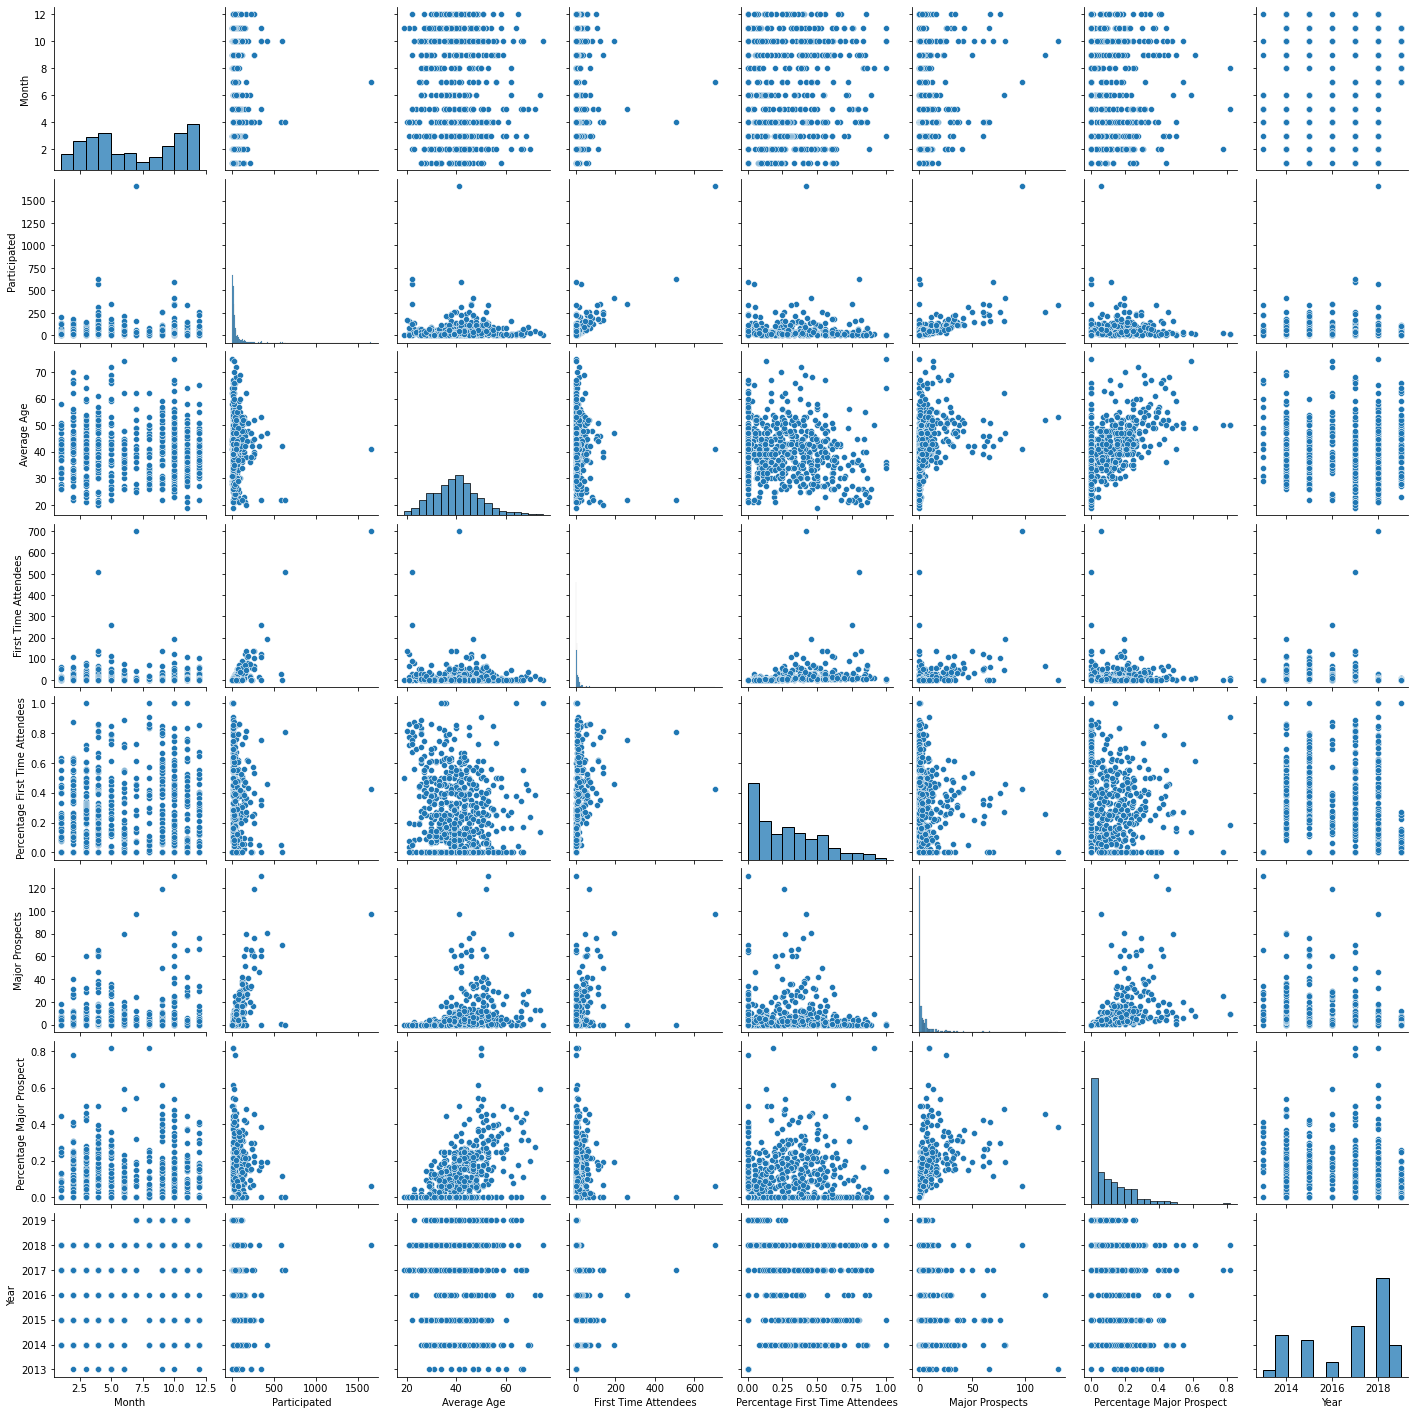

In [4]:
#correlations between variables
sns.pairplot(dataAlum)

### Using LabelEncoder function to convert the categorical variables into numerical variables, and add it into the dataframe

In [5]:
#Converting Categorical Variables into Numerical Variables
label_encoder = LabelEncoder()
CatLocation = label_encoder.fit_transform(dataAlum['Location Code'].tolist())
CatGroup = label_encoder.fit_transform(dataAlum['Group Code'].tolist())
CatActivity = label_encoder.fit_transform(dataAlum['Activity Code'].tolist())
dfAlum = dataAlum.copy()
dfAlum['Location Category']= pd.Series(CatLocation)
dfAlum['Group Category']= pd.Series(CatGroup)
dfAlum['Activity Category']= pd.Series(CatActivity)
dfAlum.head(5)

,Event Name,Activity Code,Activity Description,Location Code,Location Description,Group Code,Group Description 1,Group Description 2,Event Date,Month,...,First Time Attendees,Percentage First Time Attendees,Major Prospects,Percentage Major Prospect,Year,Weekdays,Weekend,Location Category,Group Category,Activity Category
0,Ocean City Summer Party,PEZOC,CP AAE-Ocean City Summer Party,PDES,CP DMV-Eastern Shore,PS9,CP Social,General,2019-07-06,7,...,5,0.079365,12,0.190476,2019,Saturday,Weekend,6,31,328
1,Neurodiversity on Campus and in the Workplace ...,PEAPC,CP AA-Special Topics Webinar,POWE,CP Online-Webinar,PC9,CP ProDev,General,2019-07-10,7,...,1,0.142857,0,0.000000,2019,Wednesday,Weekday,26,9,177
2,Northern NJ Terps TPN,PEANJ,CP AA-Northern NJ Terps TPN,PNNJ,CP Northeast-NNJ,PC9,CP ProDev,General,2019-07-11,7,...,2,0.071429,2,0.071429,2019,Thursday,Weekday,22,9,159
3,Philly Terps: Young Alumni Happy Hour Summer S...,PEAP1,CP AA-Philly Young Alum HH Summer Series,PNPH,CP Northeast-Philadelphia,PS9,CP Social,General,2019-07-11,7,...,0,0.000000,0,0.000000,2019,Thursday,Weekday,24,31,174
4,Philly Terps Suite Night at the Ballpark,PEAP4,CP AA-Philly Terps Ste Night at Ballpark,PNPH,CP Northeast-Philadelphia,PS9,CP Social,General,2019-07-14,7,...,3,0.136364,0,0.000000,2019,Sunday,Weekend,24,31,176


### Using heatmap to see the correlation matrix between variables

<AxesSubplot:>

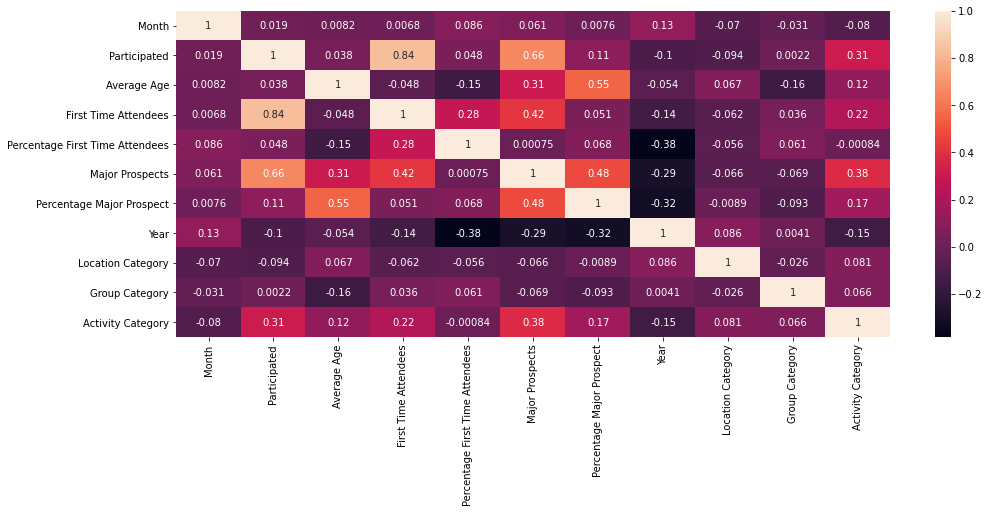

In [6]:
#Correlation Matrix using Heatmap
plt.figure(figsize=(16, 6))
corrMatrix = sns.heatmap(dfAlum.corr(), annot = True)
corrMatrix

### Using bar chart to show the Year change of Percentage First Time Attendees and Percentage Major Prospects 

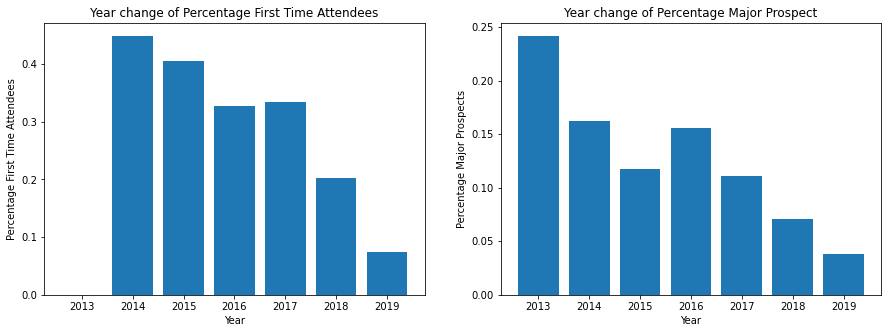

In [7]:
#Yearly Change in Percentage First Time Attendees and Percentage Major Prospects
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Year change of Percentage First Time Attendees')
First_Year = dataAlum.groupby("Year").mean()
First_Year = First_Year.reset_index()
plt.bar(First_Year["Year"],First_Year["Percentage First Time Attendees"])
plt.xlabel('Year')
plt.ylabel('Percentage First Time Attendees')
plt.grid(False)
plt.subplot(1, 2, 2)
plt.title('Year change of Percentage Major Prospect')
Major_Prospects = dataAlum.groupby("Year").mean()
Major_Prospects = Major_Prospects.reset_index()
plt.bar(Major_Prospects["Year"],Major_Prospects["Percentage Major Prospect"])
plt.xlabel('Year')
plt.ylabel('Percentage Major Prospects')
plt.grid(False)

## THE ANALYSIS OF ACTIVITY CODE

### Group by Activity Code to find out relationship between the mean of participation, major prospects percentage, and first time attendees percentage.

<AxesSubplot:xlabel='Activity Code', ylabel='Average Participation'>

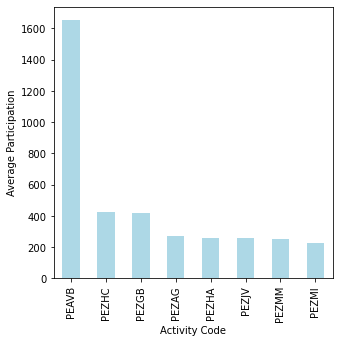

In [8]:
#group by activity code and sort by participated to show the top eight data
data_act_part = dataAlum[["Activity Code" ,"Participated"]].groupby("Activity Code").mean().sort_values(by = ["Participated"], ascending=False).head(8)
#show the pie chart
data_act_part.plot(kind = 'bar',  figsize = (5,5), stacked=True, color = 'lightblue',legend=False, ylabel="Average Participation") 

In [9]:
data_act_part = dataAlum[["Activity Code" ,"Participated"]].groupby("Activity Code").mean().sort_values(by = ["Participated"], ascending=False).reset_index().head(8)
data_act_part.style.apply(lambda x: ['background: lightgreen' if x.name in [0,1,2] else '' for i in x], axis=1)

,Activity Code,Participated
0,PEAVB,1657.000000
1,PEZHC,426.250000
2,PEZGB,418.500000
3,PEZAG,272.333333
4,PEZHA,260.000000
5,PEZJV,257.000000
6,PEZMM,255.000000
7,PEZMI,224.000000


<AxesSubplot:ylabel='Percentage First Time Attendees'>

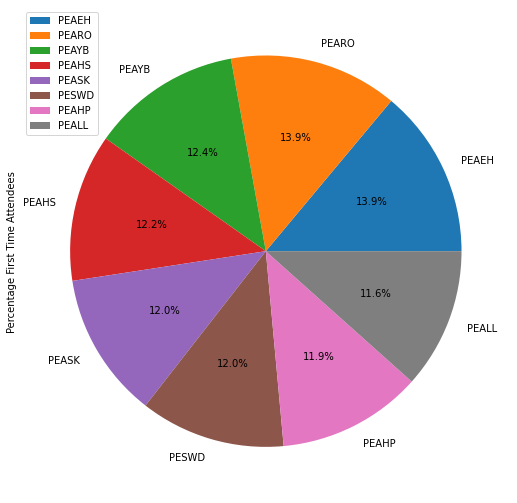

In [10]:
#group by activity code and sort by Percentage First Time Attendees to show the top eight data
data_act_fta = dataAlum[["Activity Code" ,"Percentage First Time Attendees"]].groupby("Activity Code").mean().sort_values(by = ["Percentage First Time Attendees"], ascending=False).head(8)
#show the pie chart
data_act_fta.plot(kind = 'pie', y = "Percentage First Time Attendees", figsize = (9,9), autopct='%1.1f%%')

<AxesSubplot:ylabel='Percentage Major Prospect'>

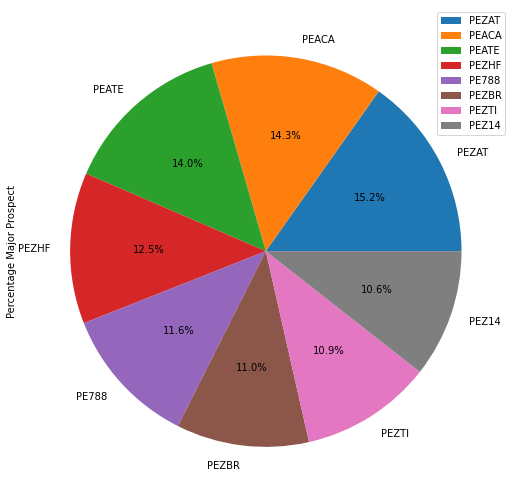

In [11]:
#group by activity code and sort by Percentage Major Prospect to show the top eight data
data_act_pmp = dataAlum[["Activity Code" ,"Percentage Major Prospect"]].groupby("Activity Code").mean().sort_values(by = ["Percentage Major Prospect"], ascending=False).head(8)
#show the pie chart
data_act_pmp.plot(kind = 'pie', y = "Percentage Major Prospect", figsize = (9,9), autopct='%1.1f%%')

## THE ANALYSIS OF LOCATION CODE

### Group by Location Code to find out relationship between the mean of participation, major prospects percentage, and first time attendees percentage.

<AxesSubplot:xlabel='Location Code', ylabel='Average Participation'>

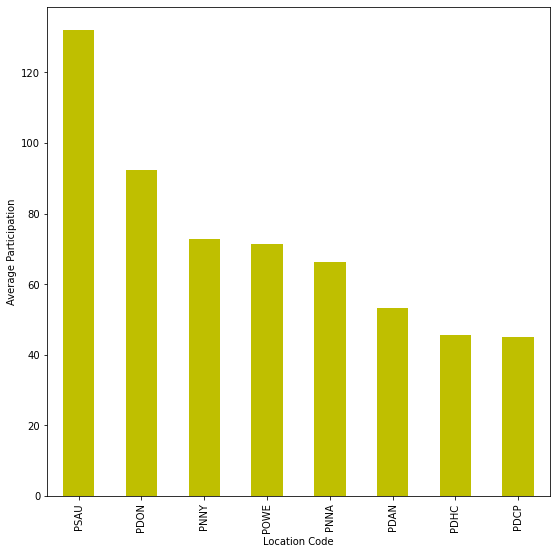

In [12]:
#group by Location code and sort by participated to show the top eight data
data_loc_part = dataAlum[["Location Code" ,"Participated"]].groupby("Location Code").mean().sort_values(by = ["Participated"], ascending=False).head(8)
#show the pie chart
data_loc_part.plot(kind = 'bar',  figsize = (9,9), color = 'y',legend=False, ylabel="Average Participation")

In [13]:
data_loc_part = dataAlum[["Location Code" ,"Participated"]].groupby("Location Code").mean().sort_values(by = ["Participated"], ascending=False).reset_index().head(8)
data_loc_part.style.apply(lambda x: ['background: lightgreen' if x.name in [0,1,2] else '' for i in x], axis=1)

,Location Code,Participated
0,PSAU,132.000000
1,PDON,92.293103
2,PNNY,72.810811
3,POWE,71.487805
4,PNNA,66.250000
5,PDAN,53.266667
6,PDHC,45.700000
7,PDCP,45.000000


<AxesSubplot:ylabel='Percentage First Time Attendees'>

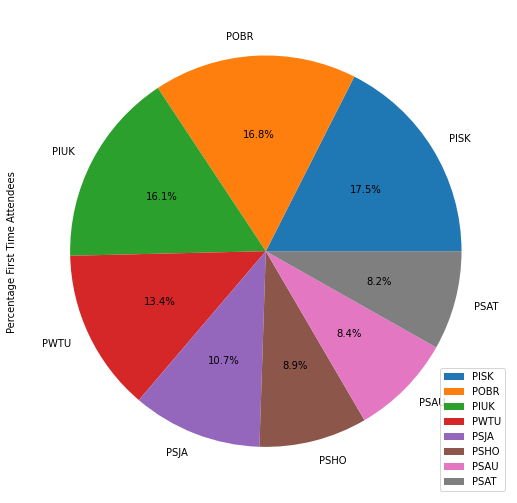

In [14]:
#group by Location Code code and sort by Percentage First Time Attendees to show the top eight data
data_loc_fta = dataAlum[["Location Code" ,"Percentage First Time Attendees"]].groupby("Location Code").mean().sort_values(by = ["Percentage First Time Attendees"], ascending=False).head(8)
#show the pie chart
data_loc_fta.plot(kind = 'pie', y = "Percentage First Time Attendees", figsize = (9,9), autopct='%1.1f%%')

<AxesSubplot:ylabel='Percentage Major Prospect'>

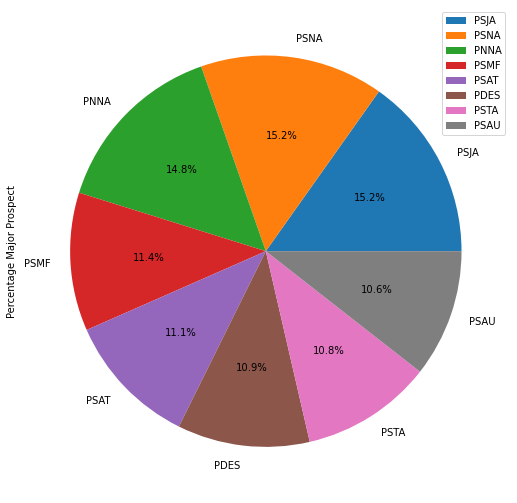

In [15]:
#group by location code and sort by Percentage Major Prospect to show the top eight data
data_loc_part = dataAlum[["Location Code" ,"Percentage Major Prospect"]].groupby("Location Code").mean().sort_values(by = ["Percentage Major Prospect"], ascending=False).head(8)
#show the pie chart
data_loc_part.plot(kind = 'pie', y = "Percentage Major Prospect", figsize = (9,9), autopct='%1.1f%%')

## THE ANALYSIS OF GROUP CODE

### Group by Group Code to find out relationship between the mean of participation, major prospects percentage, and first time attendees percentage.

<AxesSubplot:xlabel='Group Code', ylabel='Average Participation'>

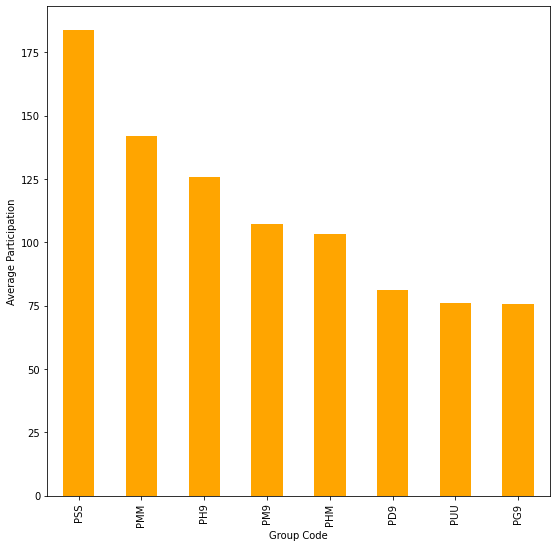

In [16]:
#group by group code and sort by participated to show the top eight data
Group_Participated = dataAlum[["Group Code", "Participated"]].groupby("Group Code").mean()
Group_Participated = Group_Participated.sort_values("Participated", ascending=False).head(8)
#show the bar chart
Group_Participated.plot(kind = 'bar', y ='Participated',figsize =(9,9), stacked=True, color = 'orange',legend=False, ylabel="Average Participation")

In [17]:
Group_Participated = dataAlum[["Group Code", "Participated"]].groupby("Group Code").mean().sort_values(by = ["Participated"], ascending=False).reset_index().head(8)
Group_Participated.style.apply(lambda x: ['background: lightgreen' if x.name in [0,1,2] else '' for i in x], axis=1)

,Group Code,Participated
0,PSS,183.928571
1,PMM,142.000000
2,PH9,125.777778
3,PM9,107.000000
4,PHM,103.166667
5,PD9,81.153846
6,PUU,76.000000
7,PG9,75.666667


<AxesSubplot:ylabel='Percentage First Time Attendees'>

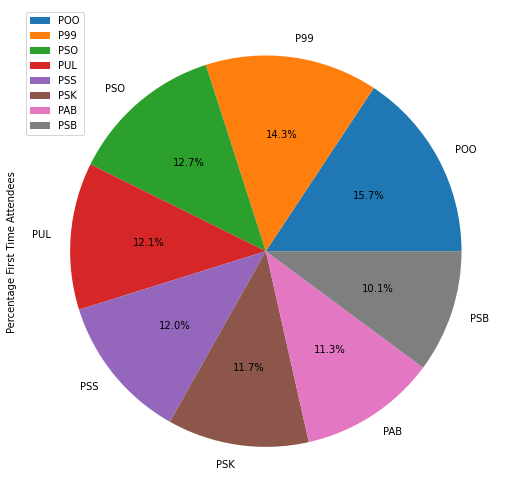

In [18]:
#group by group code and sort by percentage First Time Attendees to show the top eight data
Group_First = dataAlum[["Group Code", "Percentage First Time Attendees"]].groupby("Group Code").mean()
Group_First = Group_First.sort_values("Percentage First Time Attendees", ascending=False).head(8)
#show the pie chart
Group_First.plot(kind = 'pie', y ='Percentage First Time Attendees',figsize =(9,9) , autopct = '%1.1f%%') 

<AxesSubplot:ylabel='Percentage Major Prospect'>

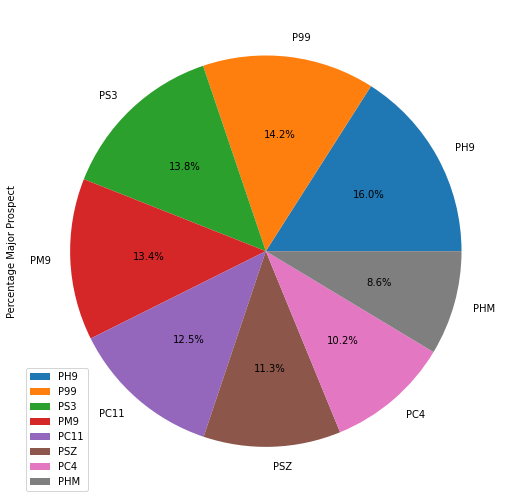

In [19]:
#group by group code and sort by percentage First Time Attendees to show the top eight data
Group_Major = dataAlum[["Group Code", "Percentage Major Prospect"]].groupby("Group Code").mean()
Group_Major = Group_Major.sort_values("Percentage Major Prospect", ascending=False).head(8)
#show the pie chart
Group_Major.plot(kind = 'pie', y ='Percentage Major Prospect',figsize =(9,9) , autopct = '%1.1f%%')  

## THE ANALYSIS OF MONTH

### Group by Month to find out relationship between the mean of participation, major prospects percentage, and first time attendees percentage.

<AxesSubplot:xlabel='Month', ylabel='Average Participation'>

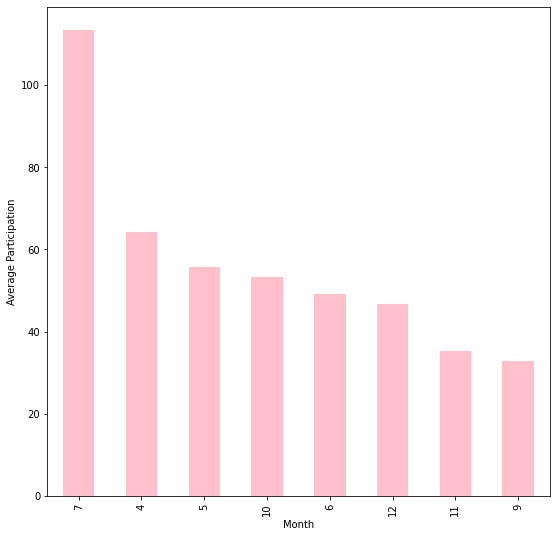

In [20]:
#group by month and sort by Participated to show the top eight data
month_Participated = dataAlum[["Month", "Participated"]].groupby("Month").mean()
month_Participated = month_Participated.sort_values("Participated", ascending=False).head(8)
#show the bar chart
month_Participated.plot(kind = 'bar', y ='Participated',figsize =(9,9), stacked=True, color = 'pink',legend=False, ylabel="Average Participation")

In [21]:
Group_Participated = dataAlum[["Month", "Participated"]].groupby("Month").mean().sort_values(by = ["Participated"], ascending=False).reset_index().head(8)
Group_Participated.style.apply(lambda x: ['background: lightgreen' if x.name in [0,1,2] else '' for i in x], axis=1)

,Month,Participated
0,7,113.368421
1,4,64.156627
2,5,55.756757
3,10,53.341463
4,6,49.263158
5,12,46.648649
6,11,35.242424
7,9,32.814815


<AxesSubplot:ylabel='Percentage First Time Attendees'>

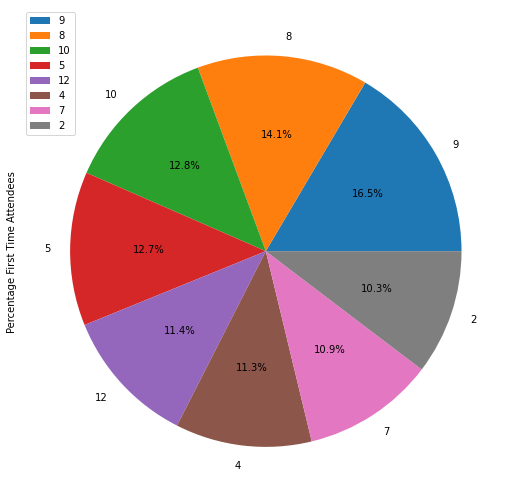

In [22]:
#group by month and sort by Percentage First Time Attendees to show the top eight data
month_First = dataAlum[["Month", "Percentage First Time Attendees"]].groupby("Month").mean()
month_First = month_First.sort_values("Percentage First Time Attendees", ascending=False).head(8)
#show the pie chart
month_First.plot(kind = 'pie', y ='Percentage First Time Attendees',figsize =(9,9) , autopct = '%1.1f%%')

<AxesSubplot:ylabel='Percentage Major Prospect'>

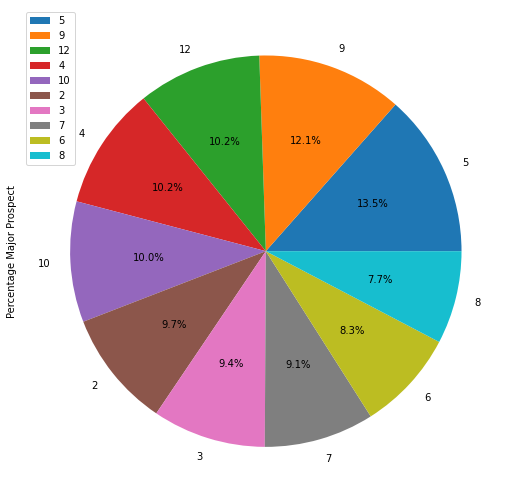

In [23]:
#group by month and sort by Percentage Major Prospect to show the top eight data
month_Major = dataAlum[["Month", "Percentage Major Prospect"]].groupby("Month").mean()
month_Major = month_Major.sort_values("Percentage Major Prospect", ascending=False).head(10)
#show the pie chart
month_Major.plot(kind = 'pie', y ='Percentage Major Prospect',figsize =(9,9) , autopct = '%1.1f%%')

## The ANALYSIS OF SMALLER GROUPS

### We separate the group description by "-", and compare the top four Percentage Major Prospect, Percentage First Time Attendees, and Participated with the whole data mean to find out our targeted groups.

In [24]:
#split into smaller group and group by it and compare the top four Percentage Major Prospect, Percentage First Time Attendees, and Participated with the whole data mean.
data_act_pros = dataAlum[["Group Description 1" ,"Percentage Major Prospect"]].groupby("Group Description 1").mean().sort_values(by = ["Percentage Major Prospect"], ascending=False).head(4)
data_act_firsttime = dataAlum[["Group Description 1" ,"Percentage First Time Attendees"]].groupby("Group Description 1").mean().sort_values(by = ["Percentage First Time Attendees"], ascending=False).head(4)
data_act_partic = dataAlum[["Group Description 1" ,"Participated"]].groupby("Group Description 1").mean().sort_values(by = ["Participated"], ascending=False).head(4)
print(dataAlum[["Percentage Major Prospect", "Percentage First Time Attendees", "Participated"]].mean())
print(data_act_pros)
print(data_act_firsttime)
print(data_act_partic)

Percentage Major Prospect           0.102214
Percentage First Time Attendees     0.276282
Participated                       44.803859
dtype: float64
                     Percentage Major Prospect
Group Description 1                           
CP General                            0.276190
CP Stewarship                         0.250000
CP Stewardship                        0.234867
CP Membership                         0.230446
                     Percentage First Time Attendees
Group Description 1                                 
CP General                                  0.761905
CP D&I                                      0.428571
CP Social                                   0.296177
CP Service                                  0.293486
                     Participated
Group Description 1              
CP Stewardship         117.700000
CP Membership          115.750000
CP Campaign             75.666667
CP Advocacy             75.500000


## THE ANALYSIS OF WEEKDAYS

### In this section, we took a deep look into the time to find relationship between the mean of participation, major prospects percentage, and first time attendees percentage.

<AxesSubplot:xlabel='Weekend', ylabel='Average Participation'>

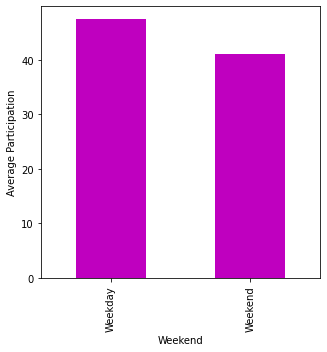

In [25]:
#differentiate the event date between Weekdays and Weekends and compare the participated mean
week_Participated = dataAlum[["Weekend", "Participated"]].groupby("Weekend").mean()
#show the bar chart
week_Participated.plot(kind = 'bar', y ='Participated',figsize =(5,5), stacked=True, color = 'm',legend=False, ylabel="Average Participation")

<AxesSubplot:xlabel='Weekend', ylabel='Average First Time Attendees Percentage'>

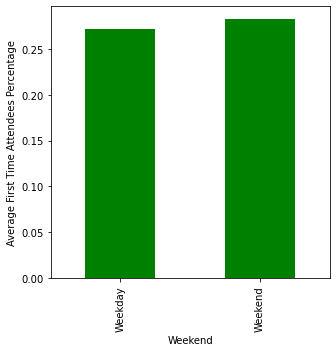

In [26]:
#differentiate the event date between Weekdays and Weekends and compare the Percentage First Time Attendees mean
week_First = dataAlum[["Weekend", "Percentage First Time Attendees"]].groupby("Weekend").mean()
#show the bar chart
week_First.plot(kind = 'bar', y ="Percentage First Time Attendees",figsize =(5,5), stacked=True, color = 'g',legend=False, ylabel="Average First Time Attendees Percentage")

<AxesSubplot:xlabel='Weekend', ylabel='Average Major Prospect Percentage'>

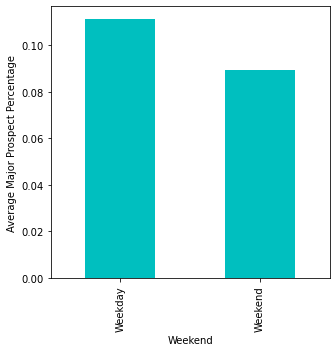

In [27]:
#differentiate the event date between Weekdays and Weekends and compare the Percentage First Time Attendees mean
week_First = dataAlum[["Weekend", "Percentage Major Prospect"]].groupby("Weekend").mean()
#show the bar chart
week_First.plot(kind = 'bar', y ="Percentage Major Prospect",figsize =(5,5), stacked=True, color = 'c',legend=False, ylabel="Average Major Prospect Percentage")

## THE ANALYSIS OF AGE AND PERCENTAGE MAJOR PROSPECTS

<AxesSubplot:xlabel='Average Age', ylabel='Percentage Major Prospect'>

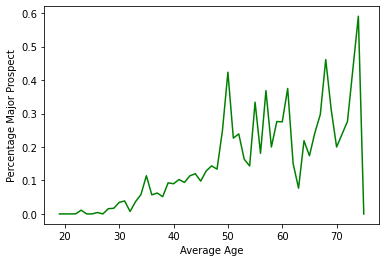

In [28]:
#compare the age and percentage major prospect
dataAlum[['Average Age', 'Percentage Major Prospect']].groupby('Average Age').mean().plot(color = 'g', legend = False, ylabel = "Percentage Major Prospect")

## MODEL TO PREDICT MAJOR PROSPECTS
### This sections aims at predicting the major prospects value using Gaussian and Kernel Regression. Since Gaussian and Kernel regression allows flexible number of parameters, we aim to incorporate attributes that are highly correlated with Major Prospects. For now, we have chosed Location Category, Group Category, Activity Category, Participated as our dependent variables

### Steps:
#### 1. Load the encoded numerical codes for Location Code, Group Code, Activity Code and values for Participated
#### 2. Split the dataset into train and test. 
#### 3. Fit the train data using Gaussian and Kernel Regression Technique
#### 4. Predict the major prospects value using test data
#### 5. Calculate the mean squared error value
#### 6. Display the codes for respective encoded categories

In [29]:
#Model to Predict Major Prospects
ProsCol = ['Location Category', 'Group Category', 'Activity Category', 'Participated']
Px = dfAlum[ProsCol].values
Py = dfAlum['Major Prospects'].values
x_train, x_test, y_train, y_test = train_test_split(Px,Py, test_size=0.2, random_state=42)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel = kernel, random_state = 41).fit(x_train,y_train)
y_valid = gpr.predict(x_test)
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_valid)))
#Prediction of Major Prospects
num  = 100

LocCode = dfAlum.loc[dfAlum['Location Category'] == x_test[num][0]]['Location Code'].values[0]
GrpCode = dfAlum.loc[dfAlum['Group Category'] == x_test[num][1]]['Group Code'].values[0]
ActCode = dfAlum.loc[dfAlum['Activity Category'] == x_test[num][2]]['Activity Code'].values[0]

print("Location Code: " + LocCode)
print("Group Code: " + GrpCode)
print("Activity Code: " + ActCode)
print("Corresponding Major Prospects Value in database: " + str(y_test[num]))
print("Prediction of Major Prospects Value: " + str(round(float(max(0, gpr.predict([x_test[num]]))),2)))

Mean squared error = 142
Location Code: PDON
Group Code: PAZ
Activity Code: PEAOH
Corresponding Major Prospects Value in database: 6
Prediction of Major Prospects Value: 5.98


### USER INPUTS
#### In this section, we ask for user inputs for Location Code, Group Code, Activity Category and Participants. We then retrive the categories for respective codes entered by user.

In [30]:
Location = input("Location Code: ")
Group = input("Group Code: ")
Activity = input("Activity Category: ")
Participants = int(input("Participants: "))
LocCode = int(dfAlum.loc[dfAlum['Location Code'] == Location]['Location Category'].values[0])
GrpCode = int(dfAlum.loc[dfAlum['Group Code'] == Group]['Group Category'].values[0])
ActCode = int(dfAlum.loc[dfAlum['Activity Code'] == Activity]['Activity Category'].values[0])

Location Code: PNPH
Group Code: PS9
Activity Category: PEZOC
Participants: 100


### PREDICTION
#### Using the inputs provided by the user, we use our Gaussian-Kernel Regression model in order to predict the major prospects. We further calculate percentage major prospects using the predicted value and participant number provided by the user

In [31]:
trial =[LocCode, GrpCode, ActCode, Participants]
MP = max(0, gpr.predict([trial]))
PercentMP = round(float((MP/Participants)*100), 2)
print("Percentage Major Prospects: " + str(PercentMP) + "%")

Percentage Major Prospects: 14.33%


## MODEL TO PREDICT FIRST TIME ATTENDEES
### This sections aims at predicting the first time attendees value using Gaussian and Kernel Regression. Since Gaussian and Kernel regression allows flexible number of parameters, we aim to incorporate attributes that are highly correlated with First Time Attendees. For now, we have chosed Location Category, Group Category, Activity Category, Participated as our dependent variables

### Steps:
#### 1. Load the encoded numerical codes for Location Code, Group Code, Activity Code and values for Participated
#### 2. Split the dataset into train and test. 
#### 3. Fit the train data using Gaussian and Kernel Regression Technique
#### 4. Predict the major prospects value using test data
#### 5. Calculate the mean squared error value
#### 6. Display the codes for respective encoded categories

In [32]:
#Model to Predict First Time Attendees
ProsCol = ['Location Category', 'Group Category', 'Activity Category', 'Participated']
Px = dfAlum[ProsCol].values
Py = dfAlum['First Time Attendees'].values
x_train, x_test, y_train, y_test = train_test_split(Px,Py, test_size=0.2, random_state=42)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel = kernel, random_state = 41).fit(x_train,y_train)
y_valid = gpr.predict(x_test)
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_valid)))
#Prediction of First Time Attendees
num  = 80

LocCode = dfAlum.loc[dfAlum['Location Category'] == x_test[num][0]]['Location Code'].values[0]
GrpCode = dfAlum.loc[dfAlum['Group Category'] == x_test[num][1]]['Group Code'].values[0]
ActCode = dfAlum.loc[dfAlum['Activity Category'] == x_test[num][2]]['Activity Code'].values[0]

print("Location Code: " + LocCode)
print("Group Code: " + GrpCode)
print("Activity Code: " + ActCode)
print("Corresponding First Time Attendees Value in database: " + str(y_test[num]))
print("Prediction of First Time Attendees Value: " + str(round(float(max(0, gpr.predict([x_test[num]]))),2)))

Mean squared error = 1136
Location Code: PDDC
Group Code: PS9
Activity Code: PEATB
Corresponding First Time Attendees Value in database: 10
Prediction of First Time Attendees Value: 9.84


### USER INPUTS
#### In this section, we ask for user inputs for Location Code, Group Code, Activity Category and Participants. We then retrive the categories for respective codes entered by user.

In [33]:
Location = input("Location Code: ")
Group = input("Group Code: ")
Activity = input("Activity Category: ")
Participants = int(input("Participants: "))
LocCode = int(dfAlum.loc[dfAlum['Location Code'] == Location]['Location Category'].values[0])
GrpCode = int(dfAlum.loc[dfAlum['Group Code'] == Group]['Group Category'].values[0])
ActCode = int(dfAlum.loc[dfAlum['Activity Code'] == Activity]['Activity Category'].values[0])

Location Code: POWE
Group Code: PC9
Activity Category: PEAP4
Participants: 150


### PREDICTION
#### Using the inputs provided by the user, we use our Gaussian-Kernel Regression model in order to predict the first time attendees. We further calculate percentage first time attendees using the predicted value and participant number provided by the user.

In [34]:
trial =[LocCode, GrpCode, ActCode, Participants]
AT = max(0, gpr.predict([trial]))
PercentAT = round(float((AT/Participants)*100), 2)
print("Percentage First Time Attendees: " + str(PercentAT) + "%")

Percentage First Time Attendees: 39.56%


## LINEAR REGRESSION
### This section aims to predict percentage major prospect using linear regression. Since, percentage major prospect is highly correlated with average age, we choose average age as the dependent variable. We plot the actual data points along with the fitted line produced by linear regression.

Text(0, 0.5, 'Percentage Major Prospect')

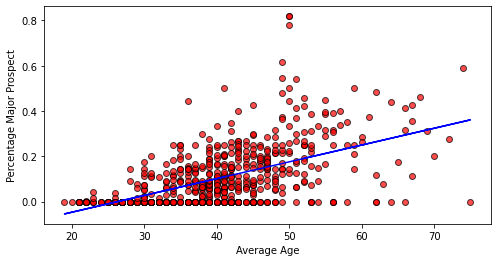

In [35]:
#Regression to predict Percentage Major Prospect using Average Age
X = dfAlum['Average Age'].values.reshape(-1,1)
Y = dfAlum['Percentage Major Prospect'].values
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
response = model.predict(X)
score = model.score(X, Y)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(X, response, color='b')
ax.scatter(X, Y, edgecolor='k', facecolor='red', alpha=0.7)
plt.xlabel("Average Age")
plt.ylabel("Percentage Major Prospect")